In [68]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import pandas as pd
import math
import numpy as np
from sklearn import linear_model

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
df = pd.read_csv('../data/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [33]:
median = math.floor(df['test_score(out of 10)'].median())
df['test_score(out of 10)'].fillna(median)

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [34]:
number_words = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4,
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13,
}
df['experience'] = (
    df['experience']
    .fillna("zero")
    .str.lower()
    .map(number_words)
    .fillna(0)
    .astype(int)
)



AttributeError: Can only use .str accessor with string values!

In [35]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [53]:
reg = linear_model.LinearRegression()
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values
reg.fit(X, df['salary($)'])

LinearRegression()

In [54]:
reg.predict([[2, 9, 6]])

array([53205.96797671])

In [55]:
reg.predict([[12, 10, 10]])

array([92002.18340611])

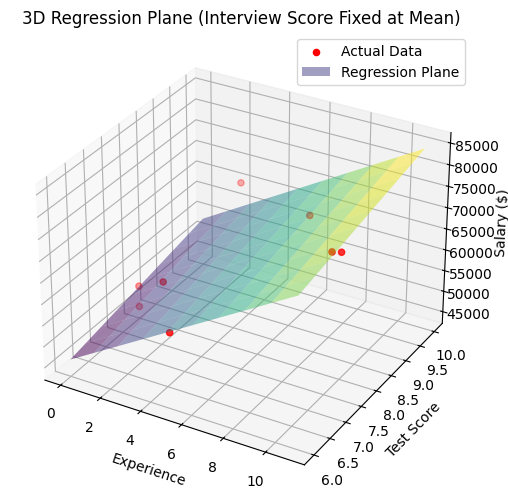

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Fix the third feature (interview_score) at its mean
fixed_interview_score = df['interview_score(out of 10)'].mean()

# Create a grid of values for experience and test_score
experience_range = np.linspace(df['experience'].min(), df['experience'].max(), 10)
test_score_range = np.linspace(df['test_score(out of 10)'].min(), df['test_score(out of 10)'].max(), 10)
exp_grid, test_grid = np.meshgrid(experience_range, test_score_range)

# Predict salaries for the grid
predicted_salaries = reg.predict(
    np.c_[
        exp_grid.ravel(),
        test_grid.ravel(),
        np.full_like(exp_grid.ravel(), fixed_interview_score)
    ]
).reshape(exp_grid.shape)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df['experience'],
    df['test_score(out of 10)'],
    df['salary($)'],
    c='red',
    marker='o',
    label='Actual Data'
)
ax.plot_surface(
    exp_grid,
    test_grid,
    predicted_salaries,
    alpha=0.5,
    cmap='viridis',
    label='Regression Plane'
)
ax.set_xlabel('Experience')
ax.set_ylabel('Test Score')
ax.set_zlabel('Salary ($)')
ax.set_title('3D Regression Plane (Interview Score Fixed at Mean)')
plt.legend()
plt.show()

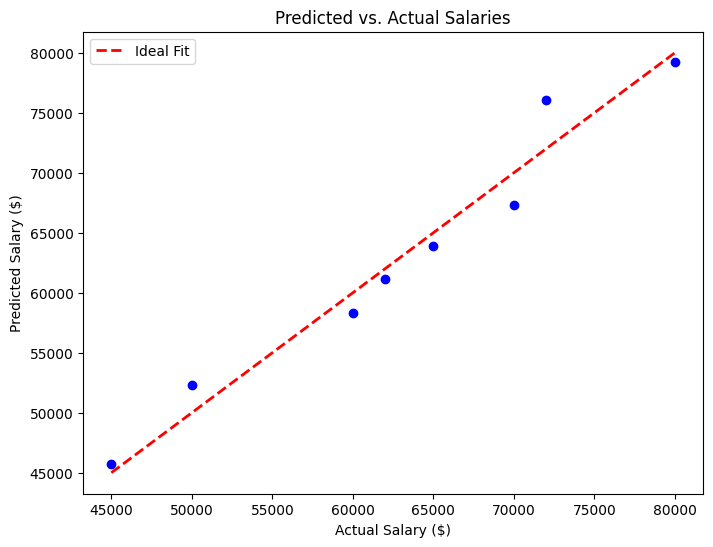

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df['salary($)'], reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values), c='blue')
plt.plot([df['salary($)'].min(), df['salary($)'].max()],
         [df['salary($)'].min(), df['salary($)'].max()],
         'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Salary ($)')
plt.ylabel('Predicted Salary ($)')
plt.title('Predicted vs. Actual Salaries')
plt.legend()
plt.show()

$$
\text{Residuals are the differences between the actual observed values (true salaries) and the predicted values from your
model:}
$$
$$
\text{Residual} = \text{Actual Salary} - \text{Predicted Salary}
$$
$$
\text{Residuals indicate how well your model fits the data. Ideally, they should be randomly scattered around zero with no
clear patterns.}
$$

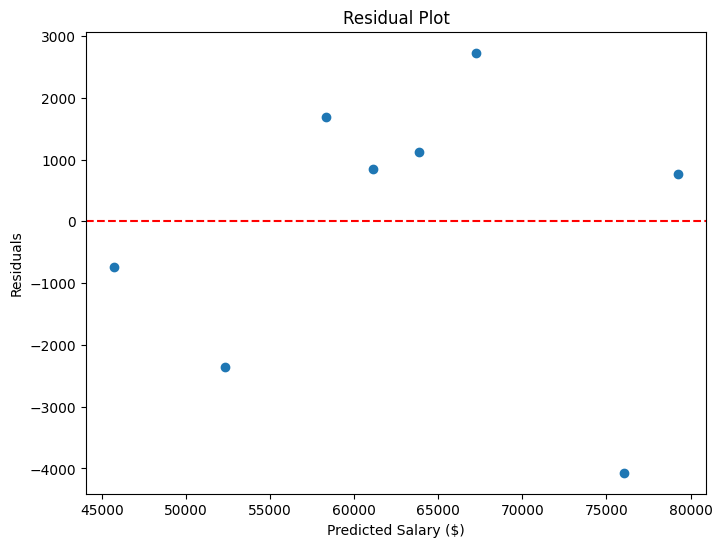

In [67]:
plt.figure(figsize=(8, 6))
# Ensure features are passed as a list of column names inside df[...]
predictions = reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values)
residuals = df['salary($)'] - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary ($)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

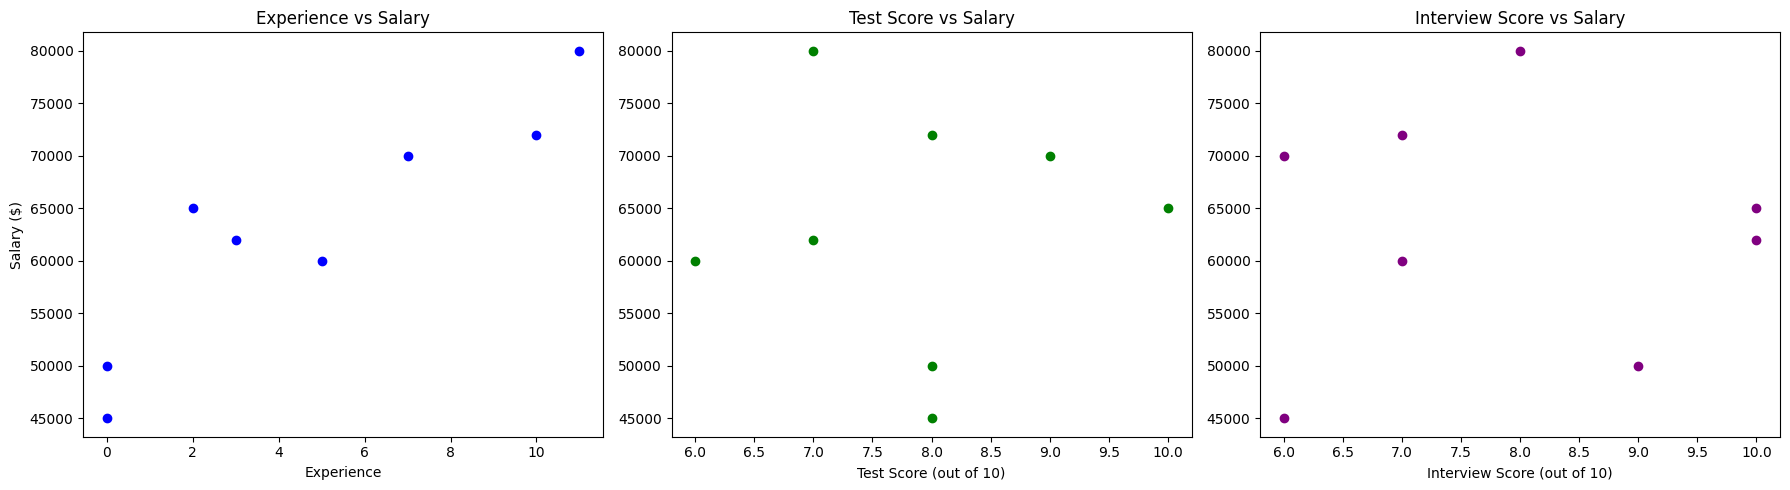

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Experience vs Salary
axes[0].scatter(df['experience'], df['salary($)'], c='blue')
axes[0].set_xlabel('Experience')
axes[0].set_ylabel('Salary ($)')
axes[0].set_title('Experience vs Salary')

# Test Score vs Salary
axes[1].scatter(df['test_score(out of 10)'], df['salary($)'], c='green')
axes[1].set_xlabel('Test Score (out of 10)')
axes[1].set_title('Test Score vs Salary')

# Interview Score vs Salary
axes[2].scatter(df['interview_score(out of 10)'], df['salary($)'], c='purple')
axes[2].set_xlabel('Interview Score (out of 10)')
axes[2].set_title('Interview Score vs Salary')

plt.tight_layout()
plt.show()